In [1]:
from google.colab import files
uploaded = files.upload()

Saving final_data.csv to final_data.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split

%matplotlib inline

df = pd.read_csv('final_data.csv')
df = df.drop(columns=['File Name','Sr'])
df = shuffle(df)
df



,Temperature,Series,Parallel,Shading,Number of cells,Voltage (V),Current (I),I/V,Solar Panel,Cell Number,Shade Percentage,IsShade
54316,40,10,1,4,10,4.37,2.18,0.50,5738,7,40.00,0
3413,27,10,1,4,10,4.14,2.19,0.53,342,4,40.00,1
101000,50,5,2,8,10,0.21,4.35,20.70,10710,1,80.00,1
84707,45,5,2,9,10,2.88,-24.42,-8.48,8979,8,90.00,1
48669,35,5,2,2,10,1.90,6.52,3.43,5173,10,20.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
44940,35,3,3,7,9,0.61,6.52,10.69,4741,7,77.78,1
30704,30,5,2,0,10,0.45,8.68,19.30,3276,5,0.00,0
66958,40,5,2,7,10,0.59,4.35,7.38,7103,9,70.00,0
15801,27,5,2,6,10,0.82,4.35,5.31,1682,2,60.00,1


In [3]:
X = df.drop('IsShade', axis=1)
y = df['IsShade']

from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=66)


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [5]:
dtc_predict = dtc.predict(X_test)

In [6]:
dtc_predict

array([1, 0, 1, ..., 0, 0, 1])

In [7]:
from sklearn.metrics import roc_auc_score
print('Train set')
train_pred = dtc.predict_proba(X_train)
print('Decision Trees: {}'.format(roc_auc_score(y_train, train_pred[:,1])))
print('Test set')
test_pred = dtc.predict_proba(X_test)
print('Decision Trees: {}'.format(roc_auc_score(y_test, test_pred[:,1])))

Train set
Decision Trees: 1.0
Test set
Decision Trees: 1.0


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
dtc_cv_score = cross_val_score(dtc, X, y, cv=10, scoring='roc_auc')

In [10]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, dtc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, dtc_predict))
print('\n')
print("=== All AUC Scores ===")
print(dtc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", dtc_cv_score.mean())

=== Confusion Matrix ===
[[17305     0]
 [    0 17233]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17305
           1       1.00      1.00      1.00     17233

    accuracy                           1.00     34538
   macro avg       1.00      1.00      1.00     34538
weighted avg       1.00      1.00      1.00     34538



=== All AUC Scores ===
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  1.0


In [12]:
from sklearn.metrics import accuracy_score

print("Train Accuracy :: ", accuracy_score(y_train, dtc.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, dtc_predict))

Train Accuracy ::  1.0
Test Accuracy  ::  1.0


In [13]:
from sklearn.model_selection import KFold
scores_dtc = []
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(
      scores_dtc.append(cross_val_score(dtc, X, y, cv=kfold))))
print("Cross-validation scores:\n{}".format(
      cross_val_score(dtc, X, y, cv=kfold)))
print(np.mean(scores_dtc))

Cross-validation scores:
None
Cross-validation scores:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


In [17]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf_vis = DecisionTreeClassifier()
clf_vis.fit(X_train,y_train)
columns=list(X_train.columns)
dot_data = tree.export_graphviz(clf_vis,out_file=None,feature_names=columns,class_names=True)
graph = graphviz.Source(dot_data)
graph.render("image",view=True)


'image.pdf'

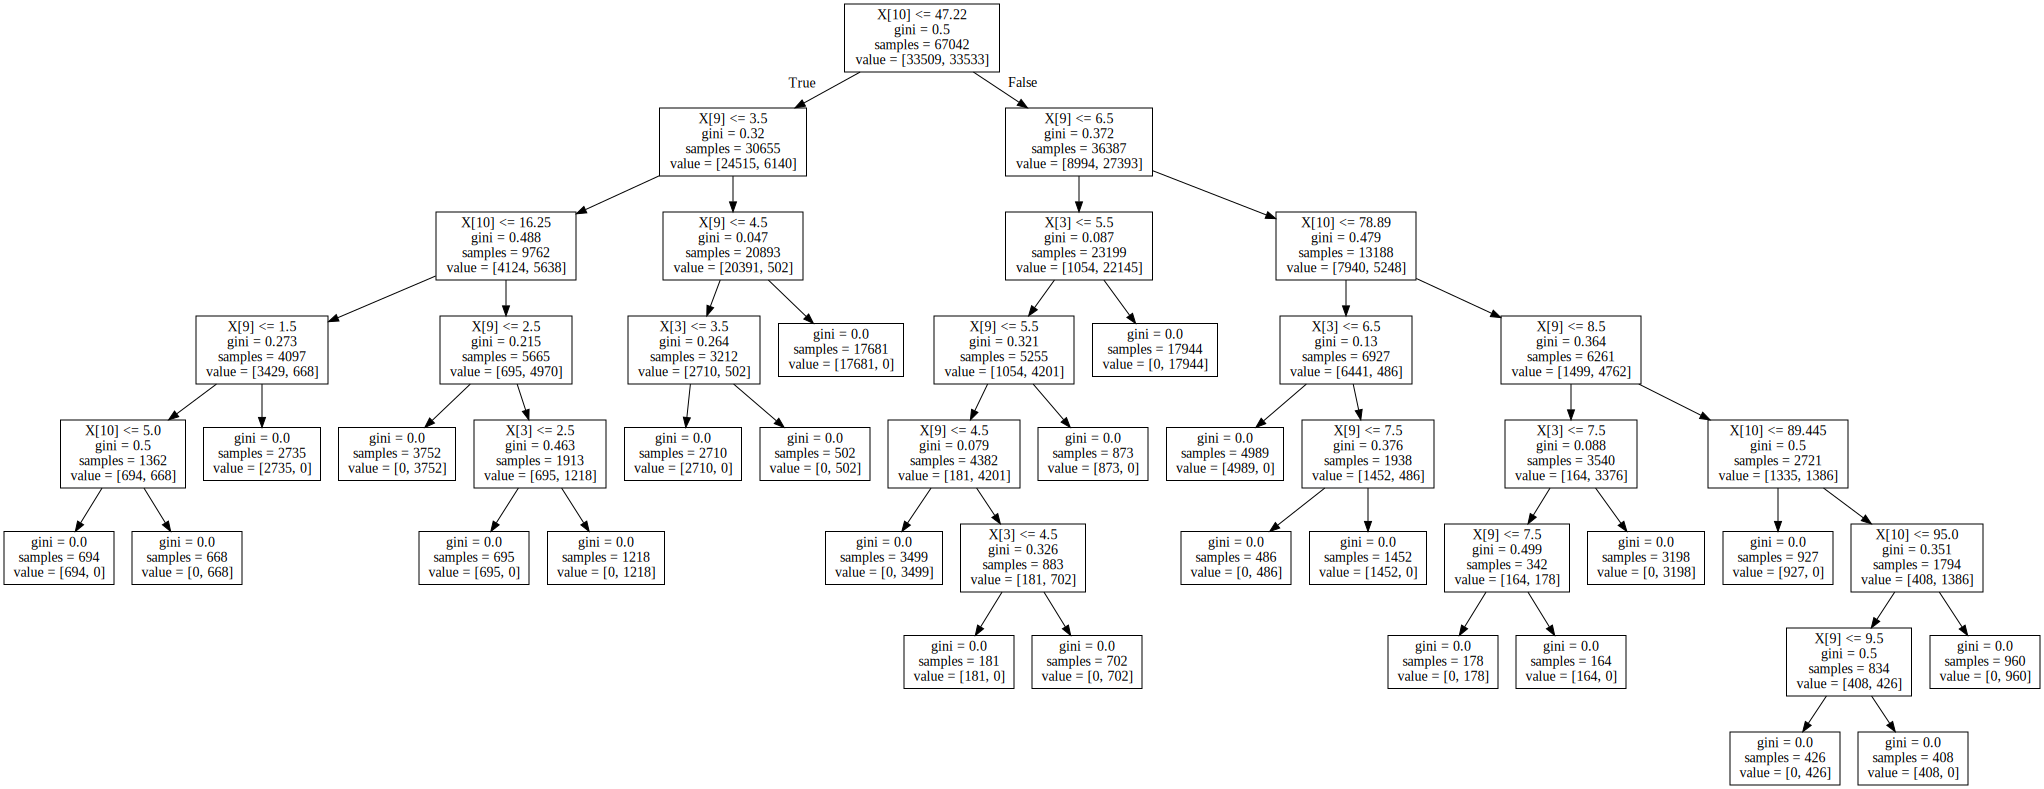

In [20]:
import graphviz
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,export_graphviz
from sklearn.datasets import make_regression

# # Generate a simple dataset
# X, y = make_regression(n_features=2, n_informative=2, random_state=0)
# clf_i = DecisionTreeRegressor(random_state=0, max_depth=2)
# clf_i.fit(X_train,y_train)
# Visualize the tree
from IPython.display import display
display(graphviz.Source(export_graphviz(dtc)))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#cf_matrix = confusion_matrix(y_test, dtc_predict)
cf_matrix = confusion_matrix(y_test, dtc_predict)
cff = [[17275,0],[0,17263]]
cf_matrix = cff
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)



#plt.figure(figsize=(16,9))
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      figsize=(10,3),
                      cmap='Blues')

AttributeError: ignored

In [ ]:
cf_matrix = confusion_matrix(y_test, dtc_predict)
#cff = [[17275,0],[0,17263]]
#cf_matrix = cff
print(cf_matrix)

[[17227     0]
 [    0 17311]]
